# Теория вероятностей и математическая статистика (семинары)
# Урок 8. Корреляционный анализ

## 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны. Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

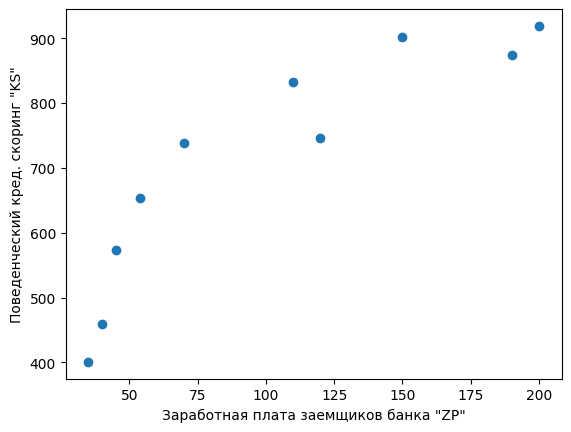

In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Найдите ковариацию этих двух величин с помощью элементарных действий
# Построим график

plt.scatter(zp,ks)
plt.xlabel('Заработная плата заемщиков банка "ZP"')
plt.ylabel('Поведенческий кред. скоринг "KS"', rotation=90)
plt.show()

Зависимость линейная.

Ковариация – это величина, определяющая зависимость  двух случайных величин.

Найти ее можно по формуле:
cov(xy) = M (XY) - M (X) * M(Y)

где М -  математическое ожидание

In [19]:
cov = np.mean(zp*ks) - np.mean(zp) * np.mean(ks)
print(f'Ковариация расчетная: {cov}') 

cov_np = np.cov(zp, ks, ddof=0)[0][1]
print(f'Ковариация из numpy: {cov_np}') 

corr = cov / (np.std(zp) * np.std(ks))
print(f'Коэффициент корреляции Пирсона (с помощью ковариации) {corr}')

corrСorrcoef = cov / (np.std(zp, ddof=0) * np.std(ks, ddof=0))
print(f'Коэффициент корреляции Пирсона (с помощью среднеквадратичных отклонений двух признаков) {corrСorrcoef }')

corrNp = np.corrcoef(zp, ks)[0][1]
print(f'Коэффициент корреляции Пирсона (функций из библиотек numpy) {corrNp}')


corrPd = pd.Series(zp).corr(pd.Series(ks), method='pearson')
print(f'Коэффициент корреляции Пирсона (функций из библиотек pandas) {corrPd}')


Ковариация расчетная: 9157.839999999997
Ковариация из numpy: 9157.84
Коэффициент корреляции Пирсона (с помощью ковариации) 0.8874900920739158
Коэффициент корреляции Пирсона (с помощью среднеквадратичных отклонений двух признаков) 0.8874900920739158
Коэффициент корреляции Пирсона (функций из библиотек numpy) 0.8874900920739162
Коэффициент корреляции Пирсона (функций из библиотек pandas) 0.8874900920739162


## 2. Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [26]:
x = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

a=0.05

n = len(x)

mean = np.mean(x)

std = np.std(x, ddof=1)

z = stats.t.ppf((1 - a/2), (n-1))

D = z * std / (n ** 0.5)

a = mean - D
b = mean + D

print(f'Доверительный интервал: [{a}, {b}]')



Доверительный интервал: [110.55608365158724, 125.64391634841274]


## 3. Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [27]:
var = 25
n = 27
mean = 174.2

a = 0.05

std = (var)**0.5

z = stats.t.ppf((1 - a/2), (n-1))

D = z * std / (n ** 0.5)

a = mean - D
b = mean + D

print(f'Доверительный интервал: [{a}, {b}]')

Доверительный интервал: [172.2220658754539, 176.17793412454608]
